In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

In [498]:
df_train_val = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/train.csv", parse_dates=['date'])
df_test = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/test.csv", parse_dates=['date'])
df_val = df_train_val.loc[df_train_val['date'] >= '2020-01-01'].reset_index().drop(columns='index')
df_train = df_train_val.loc[df_train_val['date'] < '2020-01-01'].reset_index().drop(columns='index')

display(df_train)
display(df_val)
display(df_test)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
52555,52555,2019-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,427
52556,52556,2019-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,130
52557,52557,2019-12-31,Spain,KaggleRama,Kaggle Getting Started,105
52558,52558,2019-12-31,Spain,KaggleRama,Kaggle Recipe Book,86


,row_id,date,country,store,product,num_sold
0,52560,2020-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,501
1,52561,2020-01-01,Belgium,KaggleMart,Kaggle Getting Started,404
2,52562,2020-01-01,Belgium,KaggleMart,Kaggle Recipe Book,362
3,52563,2020-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,536
4,52564,2020-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,174
...,...,...,...,...,...,...
17563,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
17564,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
17565,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
17566,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [499]:
country_weights = df_train.groupby(['country'])['num_sold'].sum() \
                / df_train['num_sold'].sum()

store_weights = df_train.groupby(['store'])['num_sold'].sum() \
              / df_train['num_sold'].sum()

display(country_weights)
display(store_weights)

country
Belgium    0.218930
France     0.191360
Germany    0.219586
Italy      0.159383
Poland     0.071348
Spain      0.139393
Name: num_sold, dtype: float64

store
KaggleMart    0.742469
KaggleRama    0.257531
Name: num_sold, dtype: float64

In [500]:
df_train_final = pd.DataFrame(df_train.groupby(['date'])['num_sold'].sum())
df_train_final = pd.merge(df_train.drop(columns='num_sold'), df_train_final, on=['date'], how='left')

df_val_final = pd.DataFrame(df_val.groupby(['date'])['num_sold'].sum())
df_val_final = pd.merge(df_val.drop(columns='num_sold'), df_val_final, on=['date'], how='left')

display(df_train_final)
display(df_val_final)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,15352
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,15352
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,15352
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,15352
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,15352
...,...,...,...,...,...,...
52555,52555,2019-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,13502
52556,52556,2019-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,13502
52557,52557,2019-12-31,Spain,KaggleRama,Kaggle Getting Started,13502
52558,52558,2019-12-31,Spain,KaggleRama,Kaggle Recipe Book,13502


,row_id,date,country,store,product,num_sold
0,52560,2020-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,11366
1,52561,2020-01-01,Belgium,KaggleMart,Kaggle Getting Started,11366
2,52562,2020-01-01,Belgium,KaggleMart,Kaggle Recipe Book,11366
3,52563,2020-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,11366
4,52564,2020-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,11366
...,...,...,...,...,...,...
17563,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,17031
17564,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,17031
17565,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,17031
17566,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,17031


In [501]:
def feature_engineering(df, is_val=False):
    new_df = df.copy()
    
    new_df['month'] = new_df['date'].dt.month
    new_df['month_sin'] = np.sin(new_df['month'] * (2.0 * np.pi / 12.0))
    new_df['month_cos'] = np.cos(new_df['month'] * (2.0 * np.pi / 12.0))
    
    new_df['day_of_year'] = new_df['date'].dt.day_of_year
    new_df['day_of_week'] = new_df['date'].dt.day_of_week
    
    new_df['day_of_year'] = new_df.apply(lambda x: x['day_of_year'] if ((x['date'] < pd.Timestamp('2020-02-29')) | (x['date'] >= pd.Timestamp('2021-01-01'))) else x['day_of_year'] - 1, axis=1)
    
    new_df['important_dates'] = new_df.apply(lambda x: x['day_of_year'] if x['day_of_year'] in [1,2,3,4,5,6,7,8,125,126,360,361,362,363,364,365] else 0, axis=1)
    new_df = pd.get_dummies(new_df, columns=['day_of_week', 'important_dates'])
    
    if is_val:
        new_df = new_df.loc[((new_df['date'] >= '2020-08-01') & (new_df['date'] < '2020-12-01'))]
    
    df_for_model = new_df.drop(columns=['date', 'month', 'day_of_year', 'row_id', 'country', 'store', 'product'])
    return df_for_model, new_df[['date', 'country', 'store', 'product']]

In [502]:
df_train_final, _ = feature_engineering(df_train_final)
df_val_final, df_val_concat = feature_engineering(df_val_final, is_val=True)
df_test_final, df_test_concat = feature_engineering(df_test)

In [503]:
x_train = df_train_final.drop(columns='num_sold')
y_train = df_train_final['num_sold']

model = Ridge(tol=1e-2, max_iter=1000000, random_state=0)
model.fit(x_train, y_train)

preds_val = model.predict(df_val_final.drop(columns='num_sold'))
df_val_final['preds'] = preds_val
df_val_final = pd.concat([df_val_final, df_val_concat], axis=1)

preds_test = model.predict(df_test_final)
df_test_final['num_sold'] = preds_test
df_test_final = pd.concat([df_test_final, df_test_concat], axis=1)

In [504]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [505]:
smape(df_val_final['num_sold'], df_val_final['preds'])

20.534681183554735

<AxesSubplot:xlabel='date', ylabel='preds'>

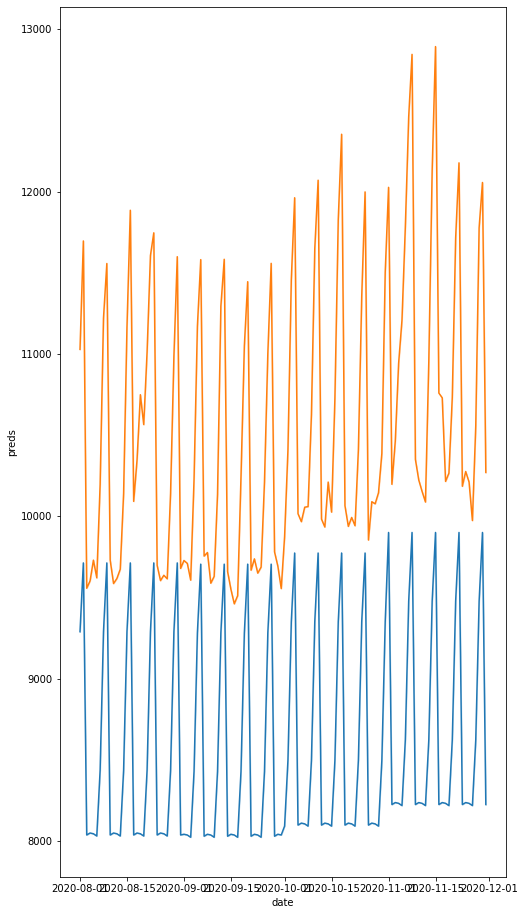

In [506]:
f, ax = plt.subplots(figsize=(8, 16))
sns.lineplot(data=df_val_final, x='date', y='preds', ax=ax)
sns.lineplot(data=df_val_final, x='date', y='num_sold', ax=ax)

In [507]:
df_product = df_train.groupby(['date', 'product'])['num_sold'].sum().reset_index()
df_product_ratio = df_product.pivot('date', 'product', 'num_sold')
df_product_ratio = df_product_ratio.apply(lambda x: x / x.sum(), axis=1)
df_product_ratio = df_product_ratio.stack().rename('ratio').reset_index()
df_product_ratio

,date,product,ratio
0,2017-01-01,Kaggle Advanced Techniques,0.277944
1,2017-01-01,Kaggle Getting Started,0.227462
2,2017-01-01,Kaggle Recipe Book,0.188900
3,2017-01-01,Kaggle for Kids: One Smart Goose,0.305693
4,2017-01-02,Kaggle Advanced Techniques,0.280014
...,...,...,...
4375,2019-12-30,Kaggle for Kids: One Smart Goose,0.304807
4376,2019-12-31,Kaggle Advanced Techniques,0.277440
4377,2019-12-31,Kaggle Getting Started,0.224633
4378,2019-12-31,Kaggle Recipe Book,0.191453


In [508]:
def weights_and_ratios(df, start_date, end_date, column_name='num_sold'):
    df_product_ratio_date = df_product_ratio.loc[((df_product_ratio['date'] >= start_date) & (df_product_ratio['date'] < end_date))].copy()
    df_product_ratio_date['mm-dd'] = df_product_ratio_date['date'].dt.strftime('%m-%d')
    df_product_ratio_date = df_product_ratio_date.drop(columns='date')

    df['mm-dd'] = df['date'].dt.strftime('%m-%d')

    df = pd.merge(df, df_product_ratio_date, how='left', on=['mm-dd', 'product'])
    
    df[column_name] *= 0.2

    for store in store_weights.index:
        df.loc[df['store'] == store, column_name] *= store_weights[store]

    df[column_name] *= df['ratio']
    
    return df

In [509]:
df_val_final = weights_and_ratios(df_val_final, start_date='2018-08-01', 
                                  end_date='2018-12-01', column_name='preds')
df_val_final = df_val_final.drop(columns='num_sold')
df_val_final = pd.concat([
    df_val_final,
    df_train_val.loc[((df_train_val['date'] >= '2020-08-01') & (df_train_val['date'] < '2020-12-01')), 'num_sold'].reset_index()
], axis=1)

display(smape(df_val_final['num_sold'], df_val_final['preds']))
display(df_val_final[['num_sold', 'preds']])

5.224800976019303

,num_sold,preds
0,330,359.694476
1,334,340.975517
2,231,212.524731
3,472,466.198896
4,125,124.762763
...,...,...
5851,410,378.742528
5852,104,105.540460
5853,108,107.432713
5854,82,79.285437


In [510]:
df_test_final = weights_and_ratios(df_test_final, start_date='2019-01-01', 
                                  end_date='2020-01-01')
df_submission = pd.concat([df_test, df_test_final['num_sold'].round()],
                          axis=1)[['row_id', 'num_sold']]
df_submission.to_csv('submission.csv', index=False)
df_submission

,row_id,num_sold
0,70128,547.0
1,70129,452.0
2,70130,369.0
3,70131,591.0
4,70132,190.0
...,...,...
17515,87643,671.0
17516,87644,211.0
17517,87645,171.0
17518,87646,145.0
